# Day 2:30 daily statistics

O desafio de hoje é modelar um conjunto de dados no R que não possui necessariamente um comportamento linear. Os dados referem-se à produção de certa variedade de grãos (prd) em relação à quantidade de fertilizante aplicado na lavoura (fert);

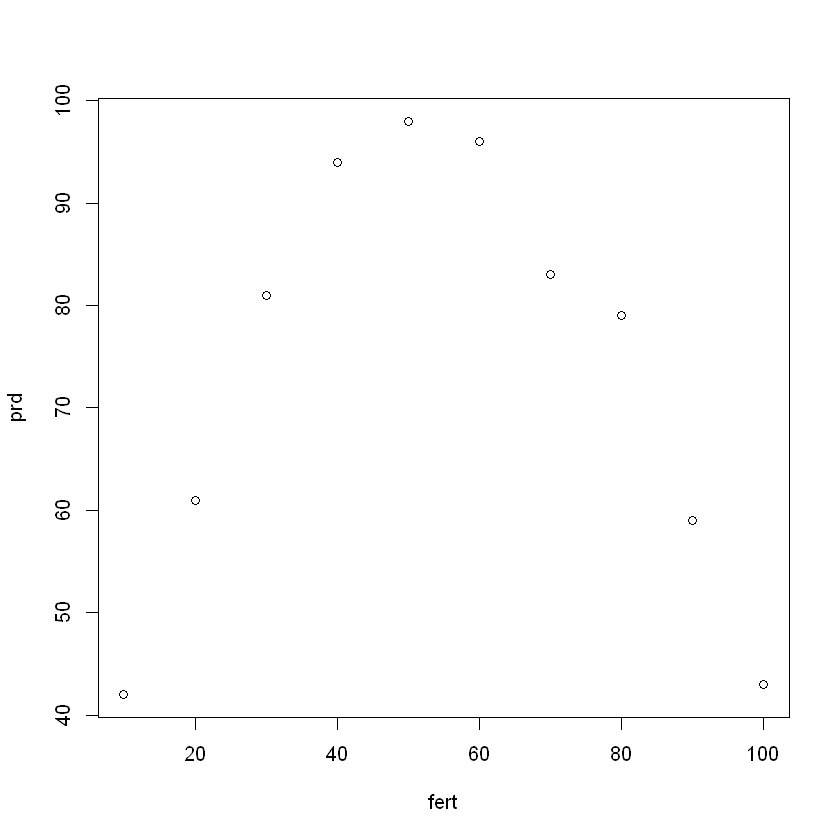

In [1]:
#Entrando com os dados
fert<- c(10,20,30,40,50,60,70,80,90,100)   #variavel independente
prd <- c(42,61,81,94,98,96,83,79,59,43)    #variavel dependente

#visualizando o comportamento dos dados
plot(fert,prd)

Pelo diagrama de dispersão é possível perceber um comportamento quadrático, desta forma, dentro do comando $lm()$ usaremos  o comando $I()$. Esse comando permite inserirmos diretamente no modelo termos do tipo $x^2$

In [2]:
reg <- lm(                  #Ajuste da regressão
    prd~fert+I(fert^2))      #Modelo quadrático

reg


Call:
lm(formula = prd ~ fert + I(fert^2))

Coefficients:
(Intercept)         fert    I(fert^2)  
   15.51667      2.95720     -0.02716  


Ajustando a curva ajustada, temos: $\hat{y}=15,516667+2,95720\cdot fert -0,0271\cdot fert^2$. Para escrevermos essa equação diretamente no R, deveremos proceder da seguinte forma: $curve(15.51667+2.95720 * x-0.02716 * x*x)$.

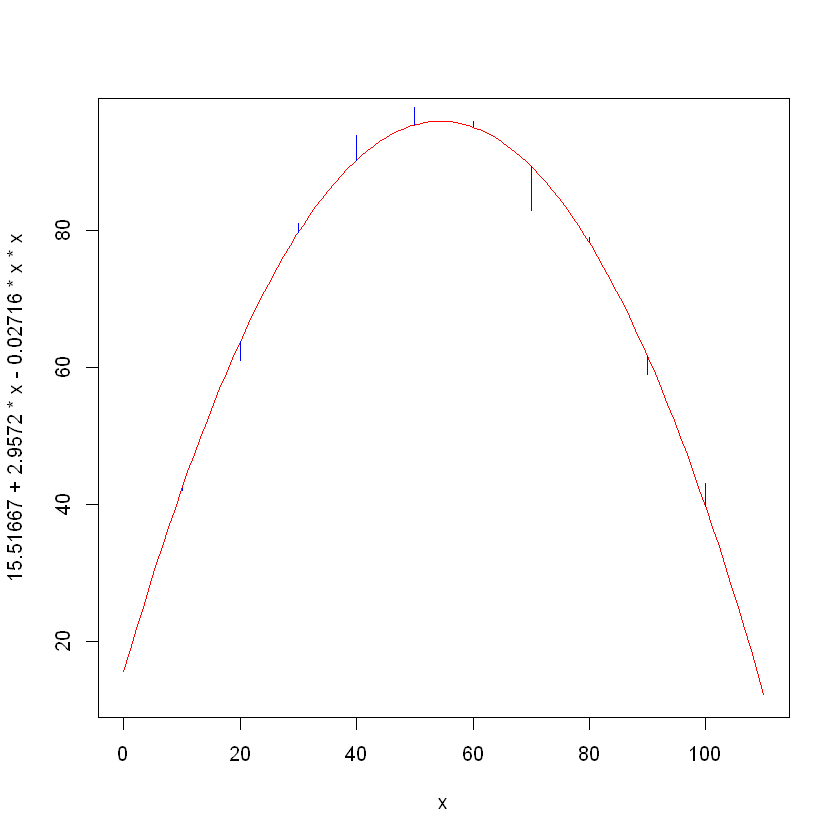

In [3]:
#inserindo a equação
curve(15.51667 + 2.95720 * x-0.02716 * x * x,      #equação
                                       0,110,      #limite do eixo das abscissas
                                       col=2,      #desenhar a curva em vermelho
                                       add=F)       #adicionar ao gráfico existente

segments(                                          #desenha segmentos de reta
                                    fert,          #de (coord. x)
                                    prd,           #de (coord. y)
                                    fert,          #para (coord. x)
                                    predict(reg),  #para (coord. y)
                                    col='blue')    #cor azul

A próxima análise envolve a ANOVA, para determinação da significância do modelo encontrado, desta forma, temos: $anova(reg)$

In [4]:
#Análise de Variância no R
anova(reg)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
fert,1,7.575758,7.575758,0.58785,4.683158e-01
I(fert^2),1,3894.613636,3894.613636,302.20721,5.125802e-07
Residuals,7,90.210606,12.887229,NA,NA


Os resultados encontrados nos levam a rejeição da hipótese nula, indicando que os coeficientes do modelo estimado podem ser considerados singificativos para o modelo.

Mais eu imagino o Professor Hidelbrando dizendo: E se nós quisermos construir uma função para realizar todo o cálculo, como seria? Um exemplo de criação de função é apresentado a seguir. 

In [5]:
hidel=function(n){                                               #Entrada de dados 10 dados
    cat("Digite os valores para o fertilizante: \n")             #Pedindo para entrar com os dados e pulando uma linha
    fert=scan(,nlines=n)                                         #digite 10 valores entrando com Enter
    cat("Digite os valores para prd: \n")
    prd=scan(,nlines=n)                                          #informe 10 valores entrando com Enter
    x = cbind(fert,fert2=fert^2)                                 #juntando os elementos como colunas 
    reg = lm(prd~x)                                              #realizando a regressão 
    return(reg)                                                  #apresentando o resultado desejado
}

#Para rodar o algoritmo, use:
# hidel(10)                                                       #O 10 significa que você irá entrar com 10 valores para fert e prd.